# Task 04

## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
df= pd.read_csv(r"C:\Users\OM KHARODE\Downloads\twitter_training.csv")

In [5]:
df


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
df = df.drop('2401',axis=1)

In [9]:
df= df.rename(columns={"Borderlands":"Feature2","im getting on borderlands and i will murder you all ,":"Feature1","Positive": "labels"})

In [10]:
df.head()

,Feature2,labels,Feature1
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
df["tweets"]= df["Feature1"].astype(str) +" "+ df["Feature2"].astype(str)
df= df.drop(["Feature1","Feature2"],axis=1)

In [12]:
df_labels = {key : value for value , key in enumerate(np.unique(df['labels']))}
df_labels

{'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}

In [13]:
def getlabel(n) : 
    for x , y in df_labels.items() : 
        if y==n : 
            return x

# EDA

## COUNT PLOT

object
['Positive' 'Neutral' 'Negative' 'Irrelevant']


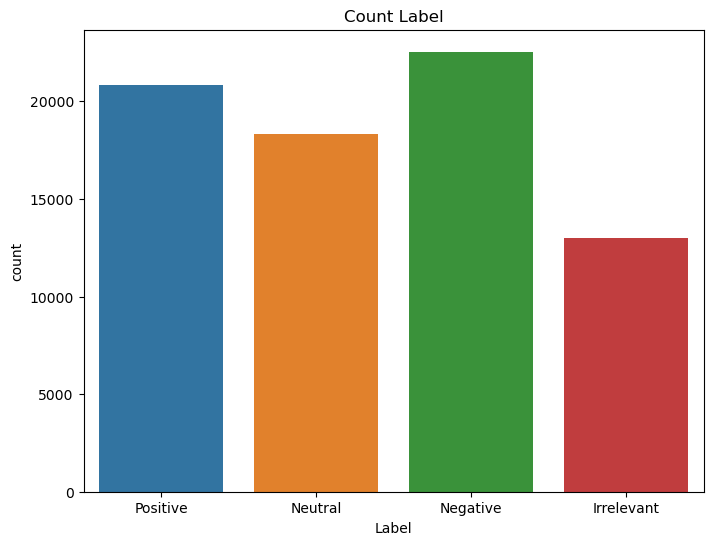

In [14]:
# Check data types and unique values
print(df['labels'].dtype)
print(df['labels'].unique())

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='labels')
plt.title('Count Label')
plt.xlabel('Label')
plt.show()

## PIE CHART

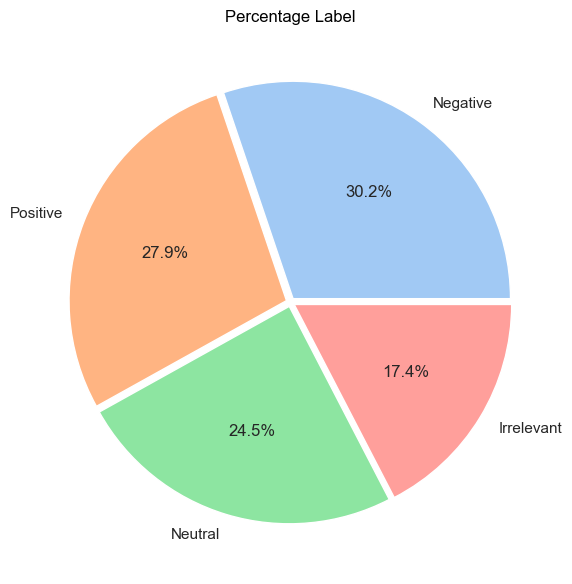

In [15]:
label_count = df['labels'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02] * len(label_count)

axes.pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes.set_title('Percentage Label')

plt.tight_layout()
plt.show()